### BLIP2 image captioning

/Users/aordorica/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.25s/it]


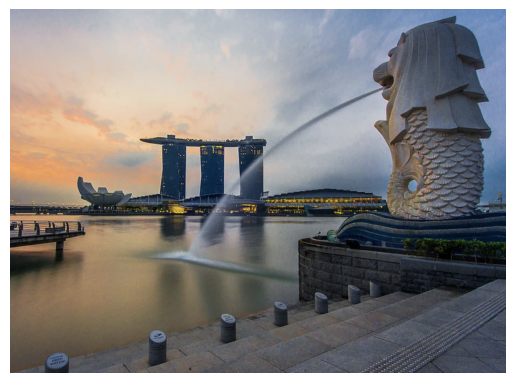

Prompted Caption: a statue in front of a water fountain


In [1]:
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Check if MPS is available and set it as the default device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load the processor and model
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
model.to(device)

def process_and_generate(image_source, text=None, max_new_tokens=20):
    # Check if the image source is a URL or a local file path
    if image_source.startswith('http'):
        # Load the image from the URL
        image = Image.open(requests.get(image_source, stream=True).raw).convert('RGB')
    else:
        # Load the image from a local file
        image = Image.open(image_source).convert('RGB')
    
    # Display the image
    plt.imshow(image)
    plt.axis("off")  # Hide the axis
    plt.show()

    # Preprocess image and text
    inputs = processor(image, text=text, return_tensors="pt")
    
    # Only convert tensor types that are not indices (like attention masks or pixel values)
    input_ids = inputs["input_ids"].to(device)
    pixel_values = inputs["pixel_values"].to(device, dtype=torch.float16)
    attention_mask = inputs["attention_mask"].to(device) if "attention_mask" in inputs else None

    # Generate text with the model
    generated_ids = model.generate(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask, max_new_tokens=max_new_tokens)
    
    # Decode generated ids to text
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    return generated_text

# Example usage
image_source = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png'  # Replace with your own image URL or local path

# Prompted image captioning
prompt = "this is a picture of"
prompted_caption = process_and_generate(image_source, text=prompt)
print("Prompted Caption:", prompted_caption)


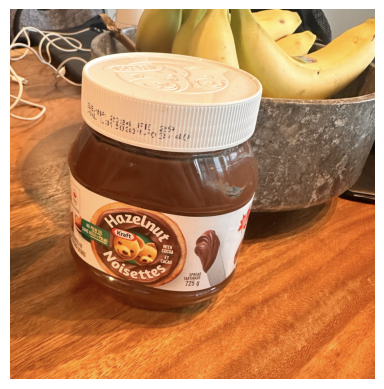

'a jar of nutella and bananas'

In [2]:
prompted_caption = process_and_generate('nutella.jpg', text='In this picture we can see')
prompted_caption